# Traffic system for the city

## About the Dataset

    Context
Collaboration with the government to transform your city into a smart city. The vision is to convert the city into a digital and intelligent hub to improve the efficiency of services for the citizens. One of the major challenges is managing traffic. As a data scientist, your role is to help improve traffic management and provide insights for infrastructure planning.

The government aims to implement a robust traffic system by anticipating traffic peaks. They need to understand traffic patterns at four key junctions of the city. Traffic on holidays and various events throughout the year differs significantly from normal working days, making this an important consideration for accurate forecasting.

    Content
Your goal is to predict traffic patterns at these four junctions for the next 4 months.

Data collection sensors at each junction have recorded traffic at different time periods, adding complexity to the dataset. Additionally, some junctions provide sparse or limited data, requiring a thoughtful approach to forecasting. Based on the historical data of 20 months, the government is relying on you to deliver accurate traffic projections for the next four months. Your algorithm will lay the groundwork for the broader initiative to make your city smart and intelligent.

    Acknowledgements
Dataset and problem details from [JanataHack: Machine Learning for IoT](https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-iot/#ProblemStatement).

    Inspiration
Further information can be found [here](https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-iot/#ProblemStatement).


In [5]:
import pandas as pd
import numpy as np

In [281]:
test_set = pd.read_csv('./data/test_ML_IOT.csv')
train_set = pd.read_csv('./data/train_ML_IOT.csv')
ss = pd.read_csv('./data/sample_submission_ML_IOT.csv')

## EDA (Exploratory Data Analysis)

In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


In [186]:
test_set.head()

,DateTime,Junction
0,2017-07-01 00:00:00,1
1,2017-07-01 01:00:00,1
2,2017-07-01 02:00:00,1
3,2017-07-01 03:00:00,1
4,2017-07-01 04:00:00,1


In [31]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [27]:
train_set.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


### Dataset Overview
    Test Data
The test dataset consists of 11,808 entries and 3 columns. Each row represents a timestamp at a particular junction, identified by an ID.

- **DateTime**: The timestamp when the traffic data was recorded.
- **Junction**: The junction number (ranging from 1 to 4) where the data was recorded.
- **Vehicles**: The number of vehicles observed at that specific time and junction. This is the target variable for prediction.
- **ID**: A unique identifier for each record.

The training dataset consists of 48,120 entries and 4 columns, including the number of vehicles observed at each junction at specific timestamps. The `Vehicles` column represents the target variable.

In [283]:
train_set['Junction'] = train_set['Junction'].astype('category')
test_set['Junction'] = test_set['Junction'].astype('category')

<Axes: xlabel='Vehicles', ylabel='Count'>

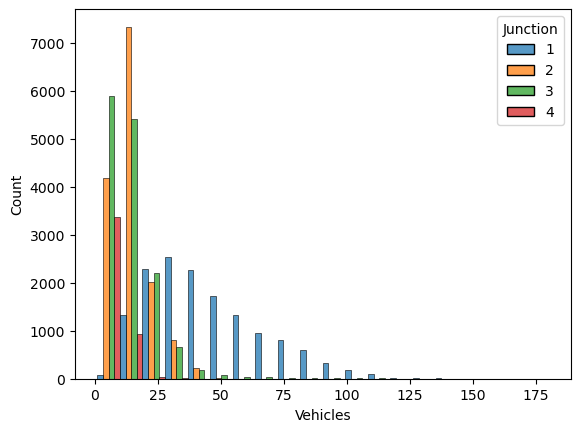

In [201]:
import seaborn as sns

sns.histplot(train_set,x='Vehicles',bins=20,hue='Junction',palette='tab10',multiple="dodge")

In [285]:
# Finding the start and end dates
start_date = train_set['DateTime'].min()
end_date = train_set['DateTime'].max()
print(start_date, end_date)

2015-11-01 00:00:00 2017-06-30 23:00:00


In [172]:
train_set.describe(include='all')

,DateTime,Junction,Vehicles,ID
count,48120,48120.0,48120.000000,4.812000e+04
unique,14592,4.0,NaN,NaN
top,2017-06-30 23:00:00,1.0,NaN,NaN
freq,4,14592.0,NaN,NaN
mean,NaN,NaN,22.791334,2.016330e+10
std,NaN,NaN,20.750063,5.944854e+06
min,NaN,NaN,1.000000,2.015110e+10
25%,NaN,NaN,9.000000,2.016042e+10
50%,NaN,NaN,15.000000,2.016093e+10
75%,NaN,NaN,29.000000,2.017023e+10


### Key insights:

The average number of vehicles observed is around `22.79`, with a maximum of `180 vehicles` at a junction at any given time.
There is a wide variation in the number of vehicles, as indicated by the standard deviation (20.75).
The data contains records for four junctions, each with an equal distribution of records except Junction 4, which has fewer entries.

In [287]:
# Checking Percentage(%) of Common ID's  between train and test data using Unique train values

np.intersect1d(train_set['ID'], test_set['ID']).shape[0]/train_set['ID'].nunique()

0.0

In [289]:
# IDs seem to be excessive so remove them

train_set.drop('ID',axis=1,inplace=True)
test_set.drop('ID',axis=1,inplace=True)

In [320]:
train_set['DateTime'] = pd.to_datetime(train_set['DateTime'])
test_set['DateTime'] = pd.to_datetime(test_set['DateTime'])

In [182]:
train_set.duplicated().sum()

0

In [184]:
train_set.isna().sum()

DateTime    0
Junction    0
Vehicles    0
dtype: int64

In [322]:
train_set_indexed = train_set.set_index('DateTime')
test_set_indexed = test_set.set_index('DateTime')

In [71]:
train_set_indexed.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [491]:
daily = train_set_indexed.resample('D').mean()

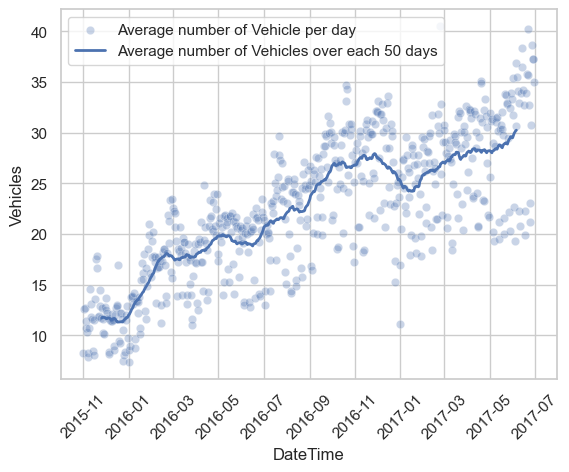

In [510]:
import matplotlib.pyplot as plt

sns.scatterplot(daily.rolling(1, center=True).mean(), x = daily.index, y = 'Vehicles',alpha=0.3,legend='auto')
sns.lineplot(daily.rolling(50, center=True).mean(), x = daily.index, y = 'Vehicles',legend='auto',linewidth=2)

plt.xticks(rotation=45)
plt.legend(['Average number of Vehicle per day','Average number of Vehicles over each 50 days'])
plt.show()

### Observations:
Average number of vehicles increases with time.

In [456]:
train_set['Junction'].value_counts()

1    14592
2    14592
3    14592
4     4344
Name: Junction, dtype: int64

<Axes: xlabel='Junction', ylabel='count'>

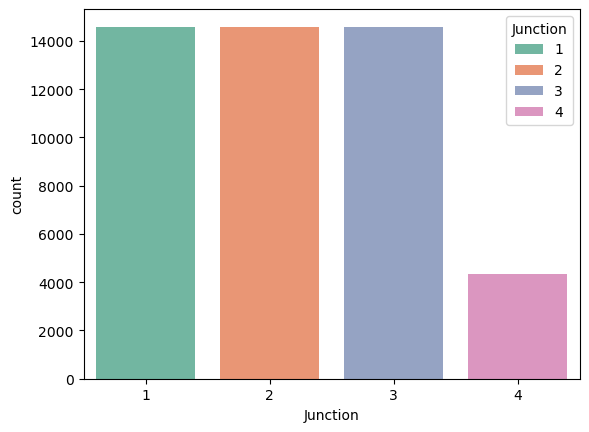

In [112]:
sns.countplot(train_set, x=train_set['Junction'],hue=train_set['Junction'],palette='Set2')

### Observation:
Junction 4 has fewer records compared to the other three junctions.

## Feature Engineering

The DateTime column is crucial for extracting temporal patterns, which could be important for predicting traffic. By analyzing this feature, we can extract additional time-based features, such as:

`Hour of the day`: Traffic patterns may vary based on time (morning, afternoon, night).

`Day of the week`: Weekdays may show different traffic patterns compared to weekends.

`Month`: Traffic may have seasonal variations.

In [327]:
def extract_time_features(df):
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['weekday'] = df.index.weekday
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

train_set_indexed = extract_time_features(train_set_indexed)
test_set_indexed = extract_time_features(test_set_indexed)

In [329]:
train_set_indexed

,Junction,Vehicles,hour,day,weekday,month,year
DateTime,,,,,,,
2015-11-01 00:00:00,1,15,0,1,6,11,2015
2015-11-01 01:00:00,1,13,1,1,6,11,2015
2015-11-01 02:00:00,1,10,2,1,6,11,2015
2015-11-01 03:00:00,1,7,3,1,6,11,2015
2015-11-01 04:00:00,1,9,4,1,6,11,2015
...,...,...,...,...,...,...,...
2017-06-30 19:00:00,4,11,19,30,4,6,2017
2017-06-30 20:00:00,4,30,20,30,4,6,2017
2017-06-30 21:00:00,4,16,21,30,4,6,2017


In [335]:
X = train_set_indexed.copy()
y = X.pop('Vehicles')

In [348]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=0.8,random_state=43)

In [376]:
X_train.head()

,Junction,hour,day,weekday,month,year
DateTime,,,,,,
2017-04-22 19:00:00,1,19,22,5,4,2017
2016-01-29 07:00:00,2,7,29,4,1,2016
2016-07-03 14:00:00,3,14,3,6,7,2016
2016-02-20 00:00:00,2,0,20,5,2,2016
2016-11-17 05:00:00,3,5,17,3,11,2016


In [353]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [355]:
predictions = model.predict(X_val)

In [517]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_val, predictions)
R2_score = metrics.r2_score(y_val, predictions)
print(f'Mean Squared Error: {mse:.3f}')
print(f'R2-score: {R2_score:.3f}')

Mean Squared Error: 15.162
R2-score: 0.963


## Interpretation:

MSE of 15.162: This is relatively low, indicating that the errors (differences between predicted and actual traffic counts) are small.


R² of 0.963: This shows that the model explains a very high proportion of the variance in traffic, meaning it captures the underlying patterns in the data very well.

Fine-tune the model or perform additional feature engineering to bring the MSE even lower, though the current results suggest the model is already doing a great job!

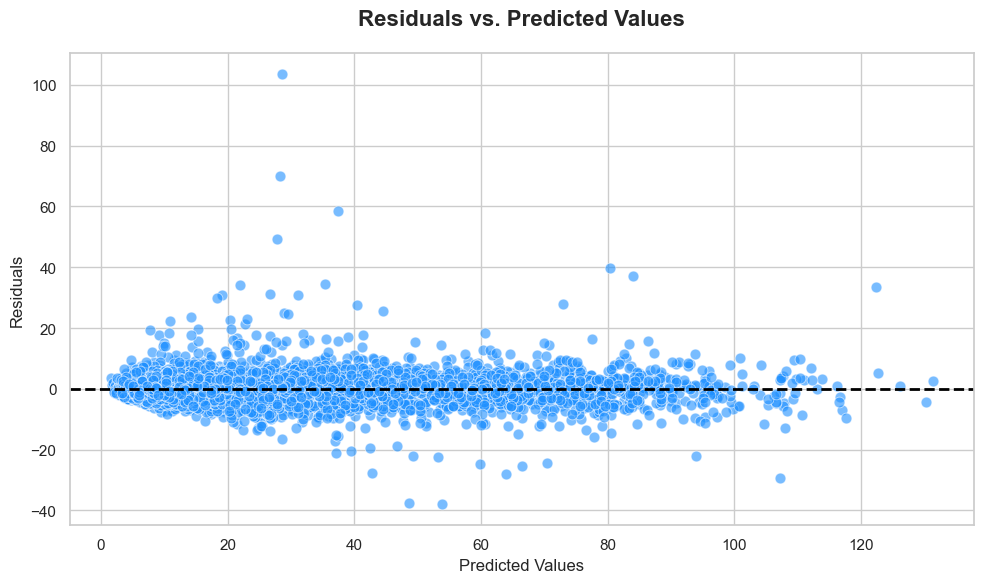

In [361]:
residuals = y_val - predictions

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.scatterplot(x=predictions, y=residuals, alpha=0.6, color='dodgerblue', s=60, edgecolor='w')
plt.axhline(0, linestyle='--', color='black', lw=2)
plt.title('Residuals vs. Predicted Values', fontsize=16, weight='bold', pad=20)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

plt.tight_layout()
plt.show()

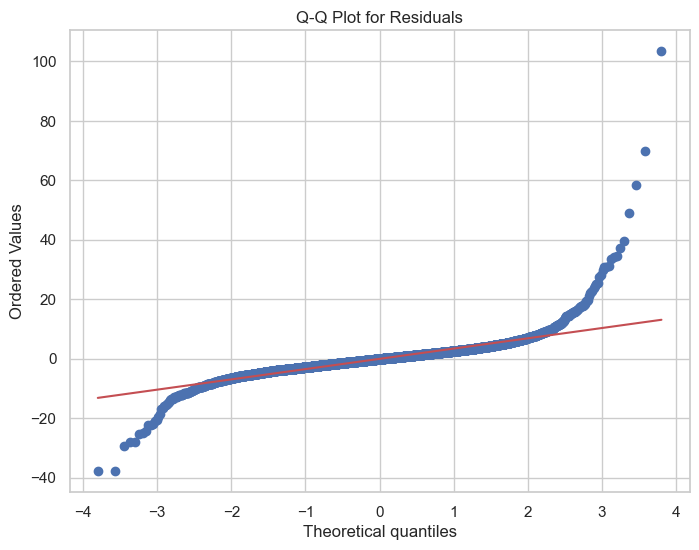

In [363]:
import scipy.stats as stats

plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()

In [369]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
5,year,18.094775
0,Junction,6.184064
2,day,4.192461
4,month,3.780610
1,hour,3.760737
3,weekday,3.248847


In [383]:
test_set_indexed['Vehicles_Predicted'] = model.predict(test_set_indexed)

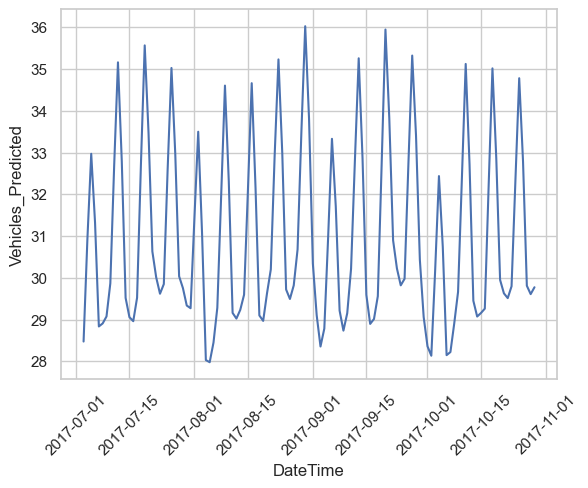

In [454]:
sns.lineplot(test_set_indexed.resample('D').mean().rolling(5,center=True).mean(),x=test_set_indexed.resample('D').mean().index,y='Vehicles_Predicted')
plt.xticks(rotation=45)
plt.show()

## Model tuning

In [446]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    # 'max_features': ['auto', 'sqrt'],     # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],      # Maximum depth of the tree
    # 'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split a node
    # 'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required at each leaf node
    # 'bootstrap': [True, False]            # Whether to bootstrap samples when building trees
}

grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid,
    cv=5,
    verbose=3, 
    n_jobs=-1
)

In [448]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'n_estimators': [100]},
             verbose=3)

In [450]:
grid_search.best_params_

{'max_depth': None, 'n_estimators': 100}

In [522]:
grid_search.best_estimator_.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [524]:
predictions_2 = grid_search.best_estimator_.predict(X_val)

In [526]:
mse = metrics.mean_squared_error(y_val, predictions_2)
R2_score = metrics.r2_score(y_val, predictions_2)
print(f'Mean Squared Error: {mse:.3f}')
print(f'R2-score: {R2_score:.3f}')

Mean Squared Error: 15.162
R2-score: 0.963
